In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/Student_Performance.csv")

In [4]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


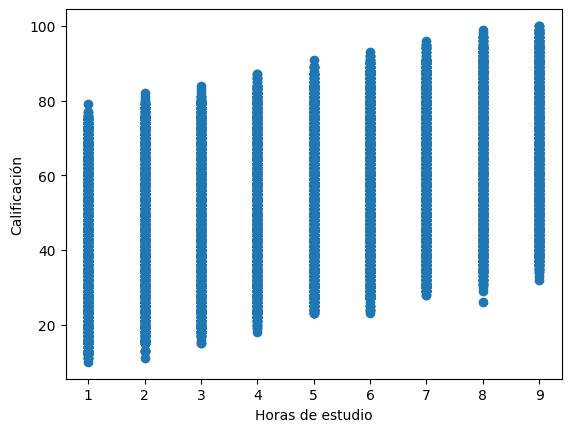

In [7]:
plt.scatter(df["Hours Studied"], df["Performance Index"])
plt.ylabel("Calificación")
plt.xlabel("Horas de estudio")
plt.show()
# No es suficiente Hours Studied para estimar Performance Index

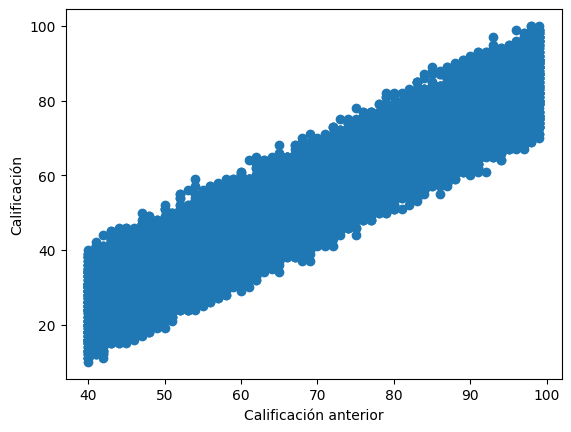

In [8]:
plt.scatter(df["Previous Scores"], df["Performance Index"])
plt.ylabel("Calificación")
plt.xlabel("Calificación anterior")
plt.show()
# No es suficiente Hours Studied para estimar Performance Index

In [14]:
extracurricular = pd.get_dummies(df["Extracurricular Activities"], drop_first = True, dtype = int)

In [16]:
df = df.drop(["Extracurricular Activities"], axis = 1)

In [17]:
df = pd.concat([extracurricular, df], axis = 1)

In [19]:
y = df[["Performance Index"]].values
X = df.drop(["Performance Index"], axis = 1).values

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [24]:
from sklearn.linear_model import LinearRegression
regMult = LinearRegression()

In [25]:
regMult.fit(X_train, y_train)

LinearRegression()

In [26]:
predicciones = regMult.predict(X_test)

In [28]:
regMult.score(X_test, y_test)

0.9887943379514139

In [29]:
from sklearn.metrics import root_mean_squared_error as rmse
rmse(y_test, predicciones)

2.0476534917796774